# Importing Data

In [180]:
import pandas as pd
import numpy as np
data = pd.read_csv("Medical_Appointment.csv")

In [181]:
data.shape

(110527, 14)

In [182]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [183]:
no_show = data["No-show"].value_counts()
print(no_show)

no_show_percent = no_show["Yes"]/ no_show.sum() * 100
print("Percentage of No-Show:",no_show_percent )

No     88208
Yes    22319
Name: No-show, dtype: int64
Percentage of No-Show: 20.193255946510806


# Recode Target Variable

In [184]:
data['No-show'] = pd.get_dummies(data['No-show'])

data['No-show'] = pd.get_dummies(data['No-show']) ### repeating because I want Yes to be '1'

# Exploratory Analysis

In [185]:
data["Gender"].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [186]:
Analysis = ['Gender','Hipertension','Alcoholism','Diabetes']
for r in Analysis :
    print(data.groupby(r)['No-show'].mean())

Gender
F    0.203146
M    0.199679
Name: No-show, dtype: float64
Hipertension
0    0.209037
1    0.173020
Name: No-show, dtype: float64
Alcoholism
0    0.201946
1    0.201488
Name: No-show, dtype: float64
Diabetes
0    0.203628
1    0.180033
Name: No-show, dtype: float64


In [187]:
data['Handcap'] = pd.Categorical(data['Handcap'])
#Convert to Dummy Variables
Handicap = pd.get_dummies(data['Handcap'], prefix = 'Handicap')
data = pd.concat([data, Handicap], axis=1)
print(data.head())

      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism Handcap  SMS_received  No-show  Handicap_0  \
0         0           0       0             0        0           1   
1         0 

In [188]:
handicaps = ["Handicap_1", "Handicap_2", "Handicap_3", "Handicap_4"]
for h in handicaps:
    print(data.groupby(h)['No-show'].mean())
    

Handicap_1
0    0.202360
1    0.179236
Name: No-show, dtype: float64
Handicap_2
0    0.201932
1    0.202186
Name: No-show, dtype: float64
Handicap_3
0    0.201929
1    0.230769
Name: No-show, dtype: float64
Handicap_4
0    0.201929
1    0.333333
Name: No-show, dtype: float64


In [189]:
data.groupby('SMS_received')['No-show'].mean()

SMS_received
0    0.167033
1    0.275745
Name: No-show, dtype: float64

In [190]:

for i in data.columns:
    print(i, ":\n{}".format(np.sort(data[i].unique())))

PatientId :
[3.922e+04 4.374e+04 9.378e+04 ... 9.999e+14 1.000e+15 1.000e+15]
AppointmentID :
[5030230 5122866 5134197 ... 5790466 5790481 5790484]
Gender :
['F' 'M']
ScheduledDay :
['2015-11-10T07:13:56Z' '2015-12-03T08:17:28Z' '2015-12-07T10:40:59Z' ...
 '2016-06-08T19:33:23Z' '2016-06-08T19:58:52Z' '2016-06-08T20:07:23Z']
AppointmentDay :
['2016-04-29T00:00:00Z' '2016-05-02T00:00:00Z' '2016-05-03T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-05T00:00:00Z' '2016-05-06T00:00:00Z'
 '2016-05-09T00:00:00Z' '2016-05-10T00:00:00Z' '2016-05-11T00:00:00Z'
 '2016-05-12T00:00:00Z' '2016-05-13T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-05-16T00:00:00Z' '2016-05-17T00:00:00Z' '2016-05-18T00:00:00Z'
 '2016-05-19T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-24T00:00:00Z'
 '2016-05-25T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-06-01T00:00:00Z' '2016-06-02T00:00:00Z' '2016-06-03T00:00:00Z'
 '2016-06-06T00:00:00Z' '2016-06-07T00:00:00Z' '2016-06-08T00:00:00Z']
Age :
[ -1   0   1   2   

In [191]:
data = data[(data['Age'] >= 0) & (data['Age'] <= 100)]


In [192]:
# Converts the two variables to datetime variables

print(data['ScheduledDay'].str.split(pat='T', expand = True))

data['ScheduledDay_Day'] = data['ScheduledDay'].str.split(pat='T', expand = True)[0]
data['AppointmentDay_Day'] = data['AppointmentDay'].str.split(pat='T', expand = True)[0]

data['ScheduledDay_Day'] = pd.to_datetime(data['ScheduledDay_Day'], infer_datetime_format=True)
data['AppointmentDay_Day'] = pd.to_datetime(data['AppointmentDay_Day'], infer_datetime_format=True)

data['day_difference'] = data['AppointmentDay_Day'] - data['ScheduledDay_Day']

data['day_difference'] = data['day_difference'].apply(lambda x: x.days) ### extract only the days 
data['day_difference'].astype(int)


                 0          1
0       2016-04-29  18:38:08Z
1       2016-04-29  16:08:27Z
2       2016-04-29  16:19:04Z
3       2016-04-29  17:29:31Z
4       2016-04-29  16:07:23Z
...            ...        ...
110522  2016-05-03  09:15:35Z
110523  2016-05-03  07:27:33Z
110524  2016-04-27  16:03:52Z
110525  2016-04-27  15:09:23Z
110526  2016-04-27  13:30:56Z

[110519 rows x 2 columns]


0          0
1          0
2          0
3          0
4          0
          ..
110522    35
110523    35
110524    41
110525    41
110526    41
Name: day_difference, Length: 110519, dtype: int32

In [193]:
data[data['day_difference'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,SMS_received,No-show,Handicap_0,Handicap_1,Handicap_2,Handicap_3,Handicap_4,ScheduledDay_Day,AppointmentDay_Day,day_difference
27033,7.839273e+12,5679978,M,2016-05-10T10:51:53Z,2016-05-09T00:00:00Z,38,RESISTÊNCIA,0,0,0,...,0,1,0,1,0,0,0,2016-05-10,2016-05-09,-1
55226,7.896294e+12,5715660,F,2016-05-18T14:50:41Z,2016-05-17T00:00:00Z,19,SANTO ANTÔNIO,0,0,0,...,0,1,0,1,0,0,0,2016-05-18,2016-05-17,-1
64175,2.425226e+13,5664962,F,2016-05-05T13:43:58Z,2016-05-04T00:00:00Z,22,CONSOLAÇÃO,0,0,0,...,0,1,1,0,0,0,0,2016-05-05,2016-05-04,-1
71533,9.982316e+14,5686628,F,2016-05-11T13:49:20Z,2016-05-05T00:00:00Z,81,SANTO ANTÔNIO,0,0,0,...,0,1,1,0,0,0,0,2016-05-11,2016-05-05,-6
72362,3.787482e+12,5655637,M,2016-05-04T06:50:57Z,2016-05-03T00:00:00Z,7,TABUAZEIRO,0,0,0,...,0,1,1,0,0,0,0,2016-05-04,2016-05-03,-1


In [194]:
# data.loc[data['day_difference'] < 0] = np.nan

data = data[data['day_difference'] > 0]

In [195]:
data['Total_No_show'] = data.groupby('PatientId')['No-show'].apply(lambda x: x.cumsum())

In [196]:
data.drop(["PatientId",'AppointmentID','ScheduledDay','ScheduledDay_Day', 'Handcap','AppointmentDay','AppointmentDay_Day', 'Neighbourhood'], axis=1, inplace = True)

In [197]:
X = data[['Gender', 'Diabetes','Hipertension', 'Scholarship', 'SMS_received','Handicap_0','Handicap_1','Handicap_2','Handicap_3','Handicap_4', 'Total_No_show', 'Age', 'day_difference']]

y = data["No-show"]


In [198]:
X_dummies = pd.get_dummies(X)

In [199]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_dummies)
rescaled = scaler.transform(X_dummies)
# summarize transformed data
np.set_printoptions(precision=3)
print(rescaled.shape)


(71954, 14)


In [200]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Create Training and Test Dataset with 75% Training and 25% Test
X_train, X_test, y_train, y_test = train_test_split(rescaled, y, test_size=0.25)

# # Run Logistic Regression
# logreg = LogisticRegression()
# logreg.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)

# # Analyze results
# print("Results:")
# print("Accuracy", metrics.accuracy_score(y_test,y_pred))

# # save confusion matrix and slice into four pieces
# confusion = metrics.confusion_matrix(y_test, y_pred)
# TP = confusion[1, 1]
# TN = confusion[0, 0]
# FP = confusion[0, 1]
# FN = confusion[1, 0]

# #Specificity: When the actual value is negative, how often is the prediction correct?
# print("Specificity:",TN / float(TN + FP))

# #False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
# print("False Positive Rate:",FP / float(TN + FP))

# #Precision: When a positive value is predicted, how often is the prediction correct?
# print("Precision:",metrics.precision_score(y_test, y_pred))

# #Sensitivity:
# print("Recall:",metrics.recall_score(y_test, y_pred))
# print("F1 Score: ", metrics.f1_score(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))


In [201]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [202]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

In [203]:
def get_stats(model, Xtrain, Xtest, ytrain, ytest):
    model.fit(Xtrain, ytrain)
    y_pred = model.predict(Xtest)
    Accuracy = accuracy_score(ytest, y_pred)
    Precision = precision_score(ytest, y_pred)
    Recall = recall_score(ytest, y_pred)
    F1_Score = f1_score(ytest, y_pred)
    
    matrix = confusion_matrix(ytest, y_pred)
    TP = matrix[1, 1]
    TN = matrix[0, 0]
    FP = matrix[0, 1]
    FN = matrix[1, 0]    
    folds = StratifiedKFold(n_splits=10)
    scores1 = cross_val_score(model, Xtrain, ytrain,cv=folds)
    print(scores1.mean(), scores1.std() * 2)

    print("Accuracy:",Accuracy)
                
    #Specificity: When the actual value is negative, how often is the prediction correct?
    print("Specificity:",TN / float(TN + FP))

    #False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
    print("False Positive Rate:",FP / float(TN + FP))

    #Precision: When a positive value is predicted, how often is the prediction correct?
    print("Precision:",Precision)

    #Sensitivity:
    print("Recall:",Recall)
    print("F1 Score: ", F1_Score)
    print("confusion matrix", matrix)

    
#     return Accuracy, Precision, Recall, F1_Score, matrix

In [204]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, precision_recall_curve, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

get_stats(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test)


0.9083110410706439 0.007686871482340396
Accuracy: 0.9057757518483518
Specificity: 0.8810167658193618
False Positive Rate: 0.11898323418063818
Precision: 0.7605349090343648
Recall: 0.9692826000792707
F1 Score:  0.8523133222967675
confusion matrix [[11403  1540]
 [  155  4891]]


In [205]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

get_stats(DecisionTreeClassifier(), X_train, X_test, y_train, y_test)

0.8731216055978164 0.007271279574659814
Accuracy: 0.8742564900772695
Specificity: 0.9170207834350614
False Positive Rate: 0.08297921656493858
Precision: 0.7822384428223844
Recall: 0.7645659928656362
F1 Score:  0.7733012627781118
confusion matrix [[11869  1074]
 [ 1188  3858]]


In [206]:
get_stats(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test)


0.8931345428018999 0.005390409516143446
Accuracy: 0.8912668853188059
Specificity: 0.9057405547400139
False Positive Rate: 0.0942594452599861
Precision: 0.779385171790235
Recall: 0.8541418945699564
F1 Score:  0.8150529500756429
confusion matrix [[11723  1220]
 [  736  4310]]


In [207]:
from sklearn.ensemble import GradientBoostingClassifier
get_stats(GradientBoostingClassifier(), X_train, X_test, y_train, y_test)

0.9128139201788656 0.005305449645611865
Accuracy: 0.9103340930568681
Specificity: 0.8754539133122151
False Positive Rate: 0.1245460866877849
Precision: 0.7578488808772721
Recall: 0.9998018232263178
F1 Score:  0.8621720926258224
confusion matrix [[11331  1612]
 [    1  5045]]


# UnderSampling

In [278]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler()
# fit and apply the transform
x_under, y_under = undersample.fit_resample(rescaled, y)

x_train, x_test, Y_train, Y_test = train_test_split(x_under, y_under,test_size=0.33, random_state=42)
print(x_under.shape)

(41038, 14)


In [268]:
import time
initial = time.time()
get_stats(LogisticRegression(solver='liblinear',multi_class='ovr'), x_train, x_test, Y_train, Y_test)
final = time.time() - initial
print("Logestic Execution Time",final)

0.9396251860180561 0.008618458294235763
Accuracy: 0.936793915675995
Specificity: 0.8728649933165008
False Positive Rate: 0.1271350066834992
Precision: 0.8883381163579441
Recall: 1.0
F1 Score:  0.9408676429953025
confusion matrix [[5877  856]
 [   0 6810]]
Logestic Execution Time 1.6702945232391357


In [269]:
initial = time.time()
get_stats(DecisionTreeClassifier(), x_train, x_test, Y_train, Y_test)
final = time.time() - initial
print("Decision Tree Execution Time",final)

0.8886338304838123 0.01090123224974478
Accuracy: 0.8853282138374068
Specificity: 0.8917273132333284
False Positive Rate: 0.10827268676667162
Precision: 0.8914370811615786
Recall: 0.8790014684287812
F1 Score:  0.8851756007393716
confusion matrix [[6004  729]
 [ 824 5986]]
Decision Tree Execution Time 1.121988296508789


In [270]:
initial = time.time()
get_stats(RandomForestClassifier(n_estimators=40),x_train, x_test, Y_train, Y_test)
final = time.time() - initial
print("Random Forest Execution Time",final)

0.9209306921525183 0.011229182121805056
Accuracy: 0.9169312559994093
Specificity: 0.8826674587850883
False Positive Rate: 0.11733254121491163
Precision: 0.8912594631796283
Recall: 0.9508076358296622
F1 Score:  0.9200710479573712
confusion matrix [[5943  790]
 [ 335 6475]]
Random Forest Execution Time 14.010659217834473


In [271]:
initial = time.time()
get_stats(GradientBoostingClassifier(), x_train, x_test, Y_train, Y_test)
final = time.time() - initial
print("Gradient Boosting Execution Time",final)

0.9395160818810148 0.00843867040813772
Accuracy: 0.936793915675995
Specificity: 0.8728649933165008
False Positive Rate: 0.1271350066834992
Precision: 0.8883381163579441
Recall: 1.0
F1 Score:  0.9408676429953025
confusion matrix [[5877  856]
 [   0 6810]]
Gradient Boosting Execution Time 40.91911196708679


# Cross Validation Applied for UnderSampling Data

In [212]:
from sklearn.model_selection import StratifiedKFold

folds = StratifiedKFold(n_splits=10)
scores1 = cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), x_train, Y_train,cv=folds)
print(scores1.mean(), scores1.std() * 2)

0.9371519296273025 0.010142319577459766


In [213]:
scores2 = cross_val_score(DecisionTreeClassifier(),x_train, Y_train, cv=folds)
print(scores2.mean(), scores2.std() * 2)

0.8883430404444592 0.009436200231388962


In [214]:
scores3 = cross_val_score(RandomForestClassifier(n_estimators=40),x_train, Y_train, cv=folds)
print(scores3.mean(), scores3.std() * 2)

0.9191489401104536 0.00988325254382904


In [215]:
scores4 = cross_val_score(GradientBoostingClassifier(),x_train, Y_train, cv=folds)
print(scores4.mean(), scores4.std() * 2)

0.9373338007209233 0.01006990199633199


# SMOTE

In [280]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27)

X_smote, y_smote = sm.fit_sample(X_train, y_train)
print(X_smote.shape)
print(X_train.shape)

(76984, 14)
(53965, 14)


In [233]:
get_stats(LogisticRegression(solver='liblinear',multi_class='ovr'), X_smote, x_test, y_smote, Y_test)


0.9389224343124936 0.003574526441531566
Accuracy: 0.9388614044155652
Specificity: 0.877023615030447
False Positive Rate: 0.12297638496955295
Precision: 0.8915946582875098
Recall: 1.0
F1 Score:  0.9426910299003323
confusion matrix [[5905  828]
 [   0 6810]]


No Skill: ROC AUC=0.500
Logistic For SMOTE: ROC AUC=0.946
Decision Tree for under: ROC AUC=0.967
Random Forest For SMOTE: ROC AUC=0.984
Gradient Boost for under: ROC AUC=0.957


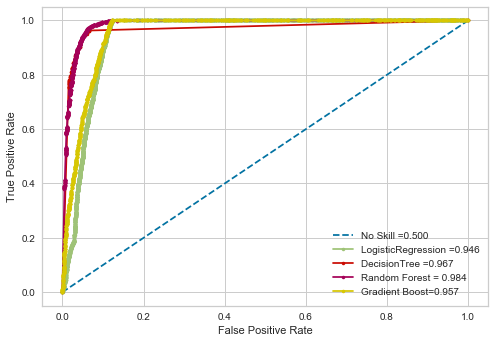

In [245]:
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(Y_test))]

model_log = LogisticRegression(solver='lbfgs')
model_log.fit(X_smote, y_smote)

model_DT = DecisionTreeClassifier()
model_DT.fit(X_smote, y_smote)

model_RF = RandomForestClassifier(n_estimators=40)
model_RF.fit(X_smote, y_smote)

model_GB = GradientBoostingClassifier()
model_GB.fit(X_smote, y_smote)

log_probs = model_log.predict_proba(x_test)
DT_probs = model_DT.predict_proba(x_test)
RF_probs = model_RF.predict_proba(x_test)
GB_probs = model_GB.predict_proba(x_test)

log_probs = log_probs[:, 1]
DT_probs = DT_probs[:, 1]
RF_probs = RF_probs[:, 1]
GB_probs = GB_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
log_auc = roc_auc_score(Y_test, log_probs)
DT_auc = roc_auc_score(Y_test, DT_probs)
RF_auc = roc_auc_score(Y_test, RF_probs)
GB_auc = roc_auc_score(Y_test, GB_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic For SMOTE: ROC AUC=%.3f' % (log_auc))
print('Decision Tree for under: ROC AUC=%.3f' % (DT_auc))
print('Random Forest For SMOTE: ROC AUC=%.3f' % (RF_auc))
print('Gradient Boost for under: ROC AUC=%.3f' % (GB_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
log_fpr, log_tpr, _ = roc_curve(Y_test, log_probs)
DT_fpr, DT_tpr, _ = roc_curve(Y_test, DT_probs)
RF_fpr, RF_tpr, _ = roc_curve(Y_test, RF_probs)
GB_fpr, GB_tpr, _ = roc_curve(Y_test, GB_probs)


# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill =%.3f' % (ns_auc))
pyplot.plot(log_fpr, log_tpr, marker='.', label='LogisticRegression =%.3f' % (log_auc))
pyplot.plot(DT_fpr, DT_tpr, marker='.', label='DecisionTree =%.3f' % (DT_auc))
pyplot.plot(RF_fpr, RF_tpr, marker='.', label='Random Forest = %.3f' % (RF_auc))
pyplot.plot(GB_fpr, GB_tpr, marker='.', label='Gradient Boost=%.3f' % (GB_auc))

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
UNDER-SAMPLING: ROC AUC=0.946
SMOTE: ROC AUC=0.946


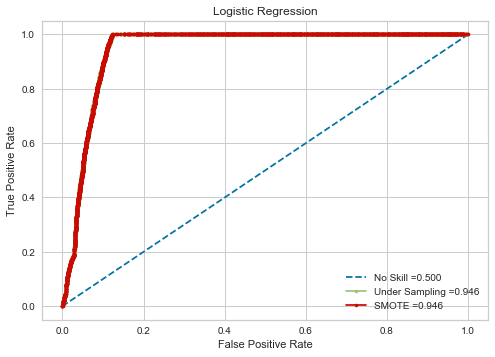

In [260]:
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(Y_test))]
# keep probabilities for the positive outcome only
# lr_probs = lr_probs[:, 1]

model_under_LR = LogisticRegression(solver='lbfgs')
model_under_LR.fit(x_under, y_under)

model_SMOTE_LR = LogisticRegression(solver='lbfgs')
model_SMOTE_LR.fit(X_smote, y_smote)



under_probs = model_under_LR.predict_proba(x_test)
SMOTE_probs = model_SMOTE_LR.predict_proba(x_test)

under_probs = under_probs[:, 1]
SMOTE_probs = SMOTE_probs[:, 1]


# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
under_auc = roc_auc_score(Y_test, under_probs)
SMOTE_auc = roc_auc_score(Y_test, SMOTE_probs)


# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('UNDER-SAMPLING: ROC AUC=%.3f' % (under_auc))
print('SMOTE: ROC AUC=%.3f' % (SMOTE_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
under_fpr, under_tpr, _ = roc_curve(Y_test, under_probs)
SMOTE_fpr, SMOTE_tpr, _ = roc_curve(Y_test, SMOTE_probs)



# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill =%.3f' % (ns_auc))
pyplot.plot(under_fpr, under_tpr, marker='.', label='Under Sampling =%.3f' % (under_auc))
pyplot.plot(SMOTE_fpr, SMOTE_tpr, marker='.', label='SMOTE =%.3f' % (SMOTE_auc))
pyplot.title("Logistic Regression")
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
UNDER-SAMPLING: ROC AUC=0.997
SMOTE: ROC AUC=0.967


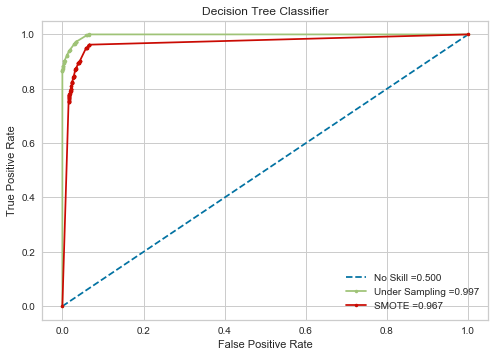

In [265]:
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(Y_test))]
# keep probabilities for the positive outcome only
# lr_probs = lr_probs[:, 1]

model_under_DT = DecisionTreeClassifier()
model_under_DT.fit(x_under, y_under)

model_SMOTE_DT = DecisionTreeClassifier()
model_SMOTE_DT.fit(X_smote, y_smote)



under_probs = model_under_DT.predict_proba(x_test)
SMOTE_probs = model_SMOTE_DT.predict_proba(x_test)

under_probs = under_probs[:, 1]
SMOTE_probs = SMOTE_probs[:, 1]


# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
under_auc = roc_auc_score(Y_test, under_probs)
SMOTE_auc = roc_auc_score(Y_test, SMOTE_probs)


# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('UNDER-SAMPLING: ROC AUC=%.3f' % (under_auc))
print('SMOTE: ROC AUC=%.3f' % (SMOTE_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
under_fpr, under_tpr, _ = roc_curve(Y_test, under_probs)
SMOTE_fpr, SMOTE_tpr, _ = roc_curve(Y_test, SMOTE_probs)



# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill =%.3f' % (ns_auc))
pyplot.plot(under_fpr, under_tpr, marker='.', label='Under Sampling =%.3f' % (under_auc))
pyplot.plot(SMOTE_fpr, SMOTE_tpr, marker='.', label='SMOTE =%.3f' % (SMOTE_auc))

pyplot.title("Decision Tree Classifier")
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
UNDER-SAMPLING: ROC AUC=0.997
SMOTE: ROC AUC=0.985


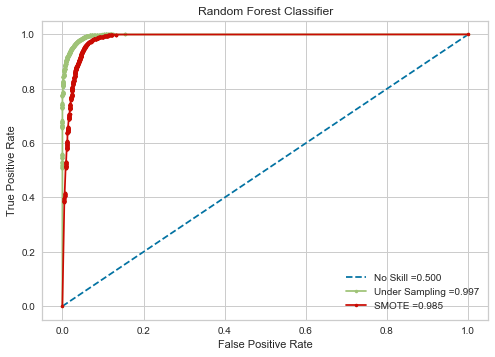

In [263]:
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(Y_test))]
# keep probabilities for the positive outcome only
# lr_probs = lr_probs[:, 1]

model_under_RF = RandomForestClassifier(n_estimators=40)
model_under_RF.fit(x_under, y_under)

model_SMOTE_RF = RandomForestClassifier(n_estimators=40)
model_SMOTE_RF.fit(X_smote, y_smote)



under_probs = model_under_RF.predict_proba(x_test)
SMOTE_probs = model_SMOTE_RF.predict_proba(x_test)

under_probs = under_probs[:, 1]
SMOTE_probs = SMOTE_probs[:, 1]


# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
under_auc = roc_auc_score(Y_test, under_probs)
SMOTE_auc = roc_auc_score(Y_test, SMOTE_probs)


# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('UNDER-SAMPLING: ROC AUC=%.3f' % (under_auc))
print('SMOTE: ROC AUC=%.3f' % (SMOTE_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
under_fpr, under_tpr, _ = roc_curve(Y_test, under_probs)
SMOTE_fpr, SMOTE_tpr, _ = roc_curve(Y_test, SMOTE_probs)



# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill =%.3f' % (ns_auc))
pyplot.plot(under_fpr, under_tpr, marker='.', label='Under Sampling =%.3f' % (under_auc))
pyplot.plot(SMOTE_fpr, SMOTE_tpr, marker='.', label='SMOTE =%.3f' % (SMOTE_auc))

pyplot.title("Random Forest Classifier")
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
UNDER-SAMPLING: ROC AUC=0.959
SMOTE: ROC AUC=0.957


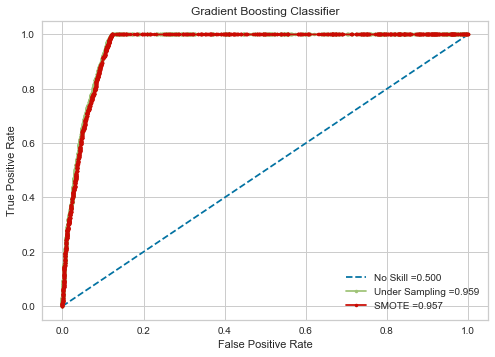

In [264]:
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(Y_test))]
# keep probabilities for the positive outcome only
# lr_probs = lr_probs[:, 1]

model_under_GB = GradientBoostingClassifier()
model_under_GB.fit(x_under, y_under)

model_SMOTE_GB = GradientBoostingClassifier()
model_SMOTE_GB.fit(X_smote, y_smote)



under_probs = model_under_GB.predict_proba(x_test)
SMOTE_probs = model_SMOTE_GB.predict_proba(x_test)

under_probs = under_probs[:, 1]
SMOTE_probs = SMOTE_probs[:, 1]


# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
under_auc = roc_auc_score(Y_test, under_probs)
SMOTE_auc = roc_auc_score(Y_test, SMOTE_probs)


# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('UNDER-SAMPLING: ROC AUC=%.3f' % (under_auc))
print('SMOTE: ROC AUC=%.3f' % (SMOTE_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
under_fpr, under_tpr, _ = roc_curve(Y_test, under_probs)
SMOTE_fpr, SMOTE_tpr, _ = roc_curve(Y_test, SMOTE_probs)



# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill =%.3f' % (ns_auc))
pyplot.plot(under_fpr, under_tpr, marker='.', label='Under Sampling =%.3f' % (under_auc))
pyplot.plot(SMOTE_fpr, SMOTE_tpr, marker='.', label='SMOTE =%.3f' % (SMOTE_auc))

pyplot.title("Gradient Boosting Classifier")
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [273]:
initial = time.time()
get_stats(LogisticRegression(solver='lbfgs'), X_smote, x_test, y_smote, Y_test)
print("Logistic Regression Execution Time",final)

0.9389224343124936 0.003574526441531566
Accuracy: 0.936793915675995
Specificity: 0.8728649933165008
False Positive Rate: 0.1271350066834992
Precision: 0.8883381163579441
Recall: 1.0
F1 Score:  0.9408676429953025
confusion matrix [[5877  856]
 [   0 6810]]
Logistic Regression Execution Time 40.91911196708679


In [274]:
initial = time.time()
get_stats(DecisionTreeClassifier(), X_smote, x_test, y_smote, Y_test)
final = time.time() - initial
print("Decision Tree Execution Time",final)

0.9108541374408266 0.07990280822539479
Accuracy: 0.9291885106697186
Specificity: 0.9566315164117035
False Positive Rate: 0.04336848358829645
Precision: 0.9546231546231546
Recall: 0.9020558002936857
F1 Score:  0.9275953189882975
confusion matrix [[6441  292]
 [ 667 6143]]
Decision Tree Execution Time 4.083683967590332


In [275]:
initial = time.time()
get_stats(RandomForestClassifier(n_estimators=40), X_smote, x_test, y_smote, Y_test)
final = time.time() - initial
print("Random Forest Execution Time",final)

0.9297529589111981 0.04188926531057542
Accuracy: 0.9482389426271874
Specificity: 0.9426704292291698
False Positive Rate: 0.057329570770830236
Precision: 0.9439035023979073
Recall: 0.9537444933920705
F1 Score:  0.9487984807537799
confusion matrix [[6347  386]
 [ 315 6495]]
Random Forest Execution Time 45.52984023094177


In [276]:
initial = time.time()
get_stats(GradientBoostingClassifier(), X_smote, x_test, y_smote, Y_test)
final = time.time() - initial
print("Gradient Boosting Execution Time",final)

0.9389094472999447 0.0036384320858164577
Accuracy: 0.936793915675995
Specificity: 0.8728649933165008
False Positive Rate: 0.1271350066834992
Precision: 0.8883381163579441
Recall: 1.0
F1 Score:  0.9408676429953025
confusion matrix [[5877  856]
 [   0 6810]]
Gradient Boosting Execution Time 147.71764707565308


# Cross Validation Applied For SMOTE Data

In [221]:
smote1 = cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_smote, y_smote,cv=folds)
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'),X_smote, y_smote, cv=folds)

print(smote1.mean(), smote1.std() * 2)

0.9389224343124936 0.003574526441531566


In [222]:
smote2 = cross_val_score(DecisionTreeClassifier(),X_smote, y_smote, cv=folds)
print(smote2.mean(), smote2.std() * 2)

0.9106722939559082 0.08030663006332886


In [223]:
smote3 = cross_val_score(RandomForestClassifier(n_estimators=40),X_smote, y_smote, cv=folds)
print(smote3.mean(), smote3.std() * 2)

0.9302984843041061 0.040477422018097016


In [224]:
smote4 = cross_val_score(GradientBoostingClassifier(),X_smote, y_smote, cv=10)
print(smote4.mean(), smote4.std() * 2)

0.9389094472999447 0.0036384320858164577


In [225]:
from sklearn.metrics import roc_curve, classification_report, confusion_matrix
logreg = GradientBoostingClassifier()
logreg = logreg.fit(X_smote, y_smote)
y_pred = logreg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93     12943
           1       0.76      1.00      0.86      5046

    accuracy                           0.91     17989
   macro avg       0.88      0.94      0.90     17989
weighted avg       0.93      0.91      0.91     17989



# Feature Selection Techinique

In [226]:
from sklearn.feature_selection import RFECV

feature_select = RFECV(estimator=GradientBoostingClassifier(), step=1 ,scoring='accuracy')   
feature_select = feature_select.fit(X_smote, y_smote)

print('Optimal number of features :', feature_select.n_features_)
print('Best features :', X_dummies.columns[feature_select.support_])

x_train_features = feature_select.transform(X_smote)
x_test_features = feature_select.transform(X_test)



Optimal number of features : 1
Best features : Index(['Total_No_show'], dtype='object')


In [227]:
get_stats(LogisticRegression(solver='liblinear',multi_class='ovr'), x_train_features, x_test_features, y_smote, y_test)

0.9389354246996071 0.0035775939066094485
Accuracy: 0.9100561454222025
Specificity: 0.8749903422699529
False Positive Rate: 0.12500965773004713
Precision: 0.757202881152461
Recall: 1.0
F1 Score:  0.8618274978650726
confusion matrix [[11325  1618]
 [    0  5046]]


In [228]:
get_stats(DecisionTreeClassifier(), x_train_features, x_test_features, y_smote, y_test)

0.9388964586001137 0.0036497538889384068
Accuracy: 0.9100561454222025
Specificity: 0.8749903422699529
False Positive Rate: 0.12500965773004713
Precision: 0.757202881152461
Recall: 1.0
F1 Score:  0.8618274978650726
confusion matrix [[11325  1618]
 [    0  5046]]


In [229]:
get_stats(RandomForestClassifier(n_estimators=40), x_train_features, x_test_features, y_smote, y_test)

0.9389094472999447 0.0035917649417092443
Accuracy: 0.9100561454222025
Specificity: 0.8749903422699529
False Positive Rate: 0.12500965773004713
Precision: 0.757202881152461
Recall: 1.0
F1 Score:  0.8618274978650726
confusion matrix [[11325  1618]
 [    0  5046]]


In [230]:
get_stats(GradientBoostingClassifier(), x_train_features, x_test_features, y_smote, y_test)

0.9389094472999447 0.0035917649417092443
Accuracy: 0.9100561454222025
Specificity: 0.8749903422699529
False Positive Rate: 0.12500965773004713
Precision: 0.757202881152461
Recall: 1.0
F1 Score:  0.8618274978650726
confusion matrix [[11325  1618]
 [    0  5046]]


# Feature Importance Techinque

C:\Users\kunap\anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


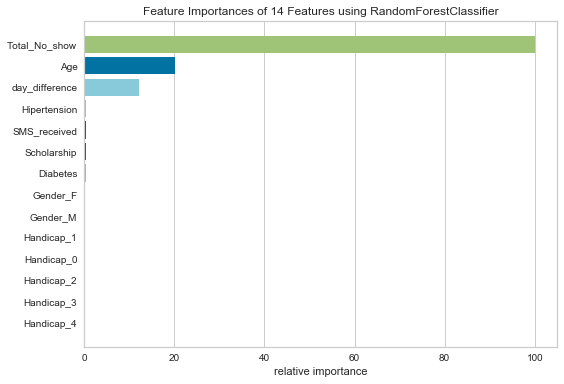

In [231]:
from sklearn.ensemble import RandomForestClassifier

from yellowbrick.model_selection import FeatureImportances

# Load the classification data set
X, y = X_dummies,y

model = RandomForestClassifier(n_estimators=10)
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()